<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/03_convopart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-07 21:22:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 108.177.97.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  29.7MB/s    in 4.4s    

2023-09-07 21:22:34 (23.9 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [67]:
#creating train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#this will rescale the data n the directory



In [68]:
#loading the data disection
#preprocessing the datasets path
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"
#next step is to turn all of our data to batches
#make sure that all the data are in the right shape

In [69]:
#Load in our image data from directories and turn them into batches
# we are using flow_from_directory is because the datas are in directories
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32, #target directory
                                               target_size=(224,244), #target sizr of image (height and width)
                                               class_mode="binary", # type of data we are working on
                                               seed=42) # size of mini batches
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             batch_size=32,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [64]:
#get samples of train and test data
images, labels = test_data.next() # saying that get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [70]:
import tensorflow as tf
#these are the libraries that we will need
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,  #how many filters should pass on the tensor(10, 32,64,128 higher the value the more complex the data)
                           kernel_size = 3, #shape of the filter could be 3,5,7 lower values learn smaller feature
                           #strides = (1,1), #if its one the filter cross 1 filter at a time you can pout it (1,1)
                           #padding = "valid", #"same" or, "valid" valid lowers the outoput shhape if you want more info put same
                           activation = "relu",
                           input_shape =(224,224, 3)) , #this is the input shape

    tf.keras.layers.Conv2D(10, 3, activation = "relu"), #same as above filter = 10 kernel = 3, strides will be 1 always and padding are same
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),


    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),

    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer (working with binary classificatication so its just 1 or zero)

])

#compile
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss= tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"])

#get fit
history_1 = model_1.fit(train_data, epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
#check the length of the data first befre fitting it
len(train_data), len(test_data),

(47, 16)

In [ ]:
batch = next(test_data)  # Load a batch of data
data, labels = batch
print(data.shape)

(32, 224, 224, 3)


In [ ]:
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data) ,
            validation_data=test_data,
            validation_steps=len(test_data))

#making a new model for this

In [1]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()



--2023-09-09 16:53:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   327MB/s    in 0.3s    

2023-09-09 16:53:06 (327 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#this one works

In [2]:
import os
#function of os named "for"

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")




import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)

#preprocess the data (scaling) // making the data between 1 and 0
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#tell tf to setup path directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from directories and turn it in to batches (by default batch size is 32)
#target size is the size we want our images to be(we are resizing them)
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#next one. is for the test data which is valid data here
#flow_from_directory is a method of the ImageDataGenerator class that allows you to read images
#from a big numpy array and folders containing images. It is capable of automatically labeling the images based on the directory structure.

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

#Building the CNN Model to find patterns on our images
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size = 3,
                          activation="relu",
                           input_shape=(224,224,3)),#3 is the color channel rgb)

     #layer here is same as the conv2d above but no names just number
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #1 because we are binary




])

#compile the cnn
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"])

#fit the model
history = model.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))




There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 141ms/step - loss: 0.6583 - accuracy: 0.5993 - val_loss: 0.5627 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4975 - accuracy: 0.7653 - val_loss: 0.3756 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4110 - accuracy: 0.8140 - val_loss: 0.3342 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 6s 132ms/step

In [16]:
import os
#function of os named "for"

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")




import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#loading the data disection
#preprocessing the datasets path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
#next step is to turn all of our data to batches
#make sure that all the data are in the right shape

#creating train and test data generators and rescale the data

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
#this will rescale the data n the directory


#Load in our image data from directories and turn them into batches
# we are using flow_from_directory is because the datas are in directories
train_data = train_datagen.flow_from_directory(directory = train_dir, #target directory
                                               target_size=(224,244), #target sizr of image (height and width)
                                               class_mode="binary", # type of data we are working on
                                               batch_size = 32) # size of mini batches
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size=32)

#get samples of train and test data
images, labels = train_data.next() # saying that get the next batch of images/labels
len(images), len(labels)


#these are the libraries that we will need
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,  #how many filters should pass on the tensor(10, 32,64,128 higher the value the more complex the data)
                           kernel_size = 3, #shape of the filter could be 3,5,7 lower values learn smaller feature
                           strides = 1, #if its one the filter cross 1 filter at a time you can pout it (1,1)
                           padding = "valid", #"same" or, "valid" valid lowers the outoput shhape if you want more info put same
                           activation = "relu",
                           input_shape =(224,224, 3) ) , #this is the input shape

    tf.keras.layers.Conv2D(10, 3, activation = "relu"), #same as above filter = 10 kernel = 3, strides will be 1 always and padding are same
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer (working with binary classificatication so its just 1 or zero)

])

#compile
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss= tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"])

#fit
model_1.summary()


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_22 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 218, 218, 10)      910       
    

In [17]:
#fit the model
history_1 = model_1.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5


InvalidArgumentError: ignored

#this one really works


In [4]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

# Get the first two images
images[:2], images[0].shape

NameError: ignored

   [0.49803925, 0.43137258, 0.227451  ],
          [0.7725491 , 0.7137255 , 0.49803925],
          [0.7960785 , 0.73333335, 0.5294118 ]]]], dtype=float32),
 (224, 224, 3))

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_2 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

##let make a new basemodel for the model_5

In [7]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()



--2023-09-09 16:53:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   350MB/s    in 0.3s    

2023-09-09 16:53:52 (350 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [6]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen_5 = ImageDataGenerator(rescale=1/255.)
test_datagen_5 = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [8]:
train_data_5 = train_datagen_5.flow_from_directory(directory=train_dir,
                                                   target_size=(224,224),
                                                   class_mode="binary",
                                                   batch_size=32)
test_data_5 = test_datagen_5.flow_from_directory(directory=test_dir,
                                                 target_size=(224,224),
                                                 class_mode = "binary",
                                                 batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)), #number 3 is the RGB
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [10]:
model_5.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"])

In [11]:
history_5 = model_5.fit(train_data_5, epochs = 5,
                        steps_per_epoch=len(train_data_5),
                        validation_data=test_data_5,
                        validation_steps=len(test_data_5)
                        )

Epoch 1/5
47/47 [==============================] - 20s 126ms/step - loss: 0.6027 - accuracy: 0.6687 - val_loss: 0.4714 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4564 - accuracy: 0.7893 - val_loss: 0.3883 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4180 - accuracy: 0.8093 - val_loss: 0.3618 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3961 - accuracy: 0.8240 - val_loss: 0.3273 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3955 - accuracy: 0.8273 - val_loss: 0.3489 - val_accuracy: 0.8360


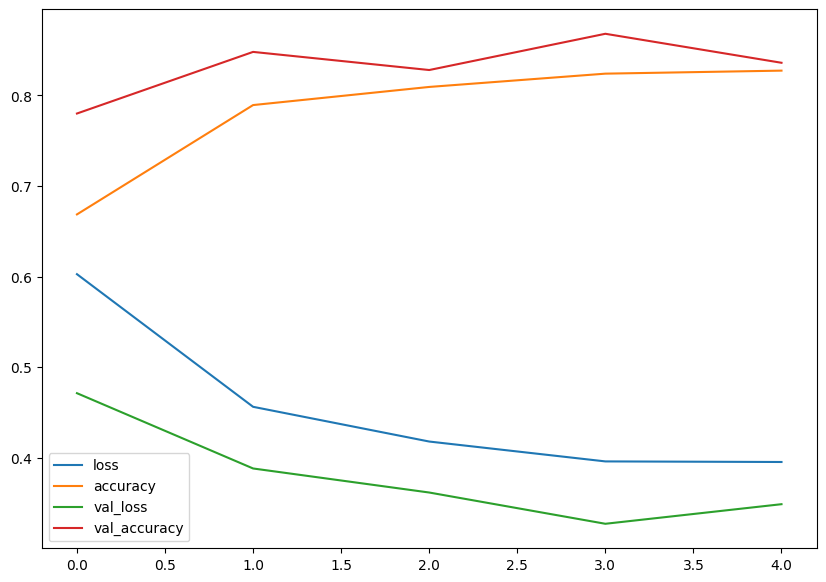

In [12]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10, 7));

In [15]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

#Multiclass CNN

## Part1

In [1]:
#become one with the data
#preprocess the data
#create a model
#fit the model / overfit it to make sure it works
#evaluate the model
#adjust hyperparameter to make it better
#repeat until satisfy

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-10 01:43:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.207, 64.233.183.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  87.0MB/s    in 4.0s    

2023-09-10 01:43:22 (124 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
from posixpath import dirname
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} files in the directory {dirpath}")

there are 2 directories and 0 files in the directory 10_food_classes_all_data
there are 10 directories and 0 files in the directory 10_food_classes_all_data/train
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/pizza
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/sushi
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/ice_cream
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/steak
there are 0 directories and 750 files in the directory 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 files in the directory 10_food_classes_a

In [4]:
train_dir_full = "/content/10_food_classes_all_data/test/"
test_dir_full = "/content/10_food_classes_all_data/train/"

#lets get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir_full)
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
